In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = df.drop(['target'], axis=1)
X = StandardScaler().fit_transform(X)
y = df.target

print(X[:5])
y

[[-0.26843658  0.66150409 -0.91575542 -0.37763552 -0.65933209 -0.41887792
   0.89125488  0.82132052 -0.71228712 -0.06088839  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542  0.4791073  -0.83386117  2.38733039
  -1.00404855  0.2559679   1.40392824  1.72713707 -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542  0.76468824 -1.39623266 -0.41887792
   0.89125488 -1.04869198  1.40392824  1.30141672 -2.24367514 -0.73197147
   1.08985168]
 [ 0.72407944  0.66150409 -0.91575542  0.93603681 -0.83386117 -0.41887792
   0.89125488  0.51689988 -0.71228712 -0.91232909  0.99543334  0.23862459
   1.08985168]
 [ 0.834359   -1.51170646 -0.91575542  0.36487493  0.93082177  2.38733039
   0.89125488 -1.87497657 -0.71228712  0.70540823 -0.6241209   2.17981673
  -0.52212231]]


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

In [5]:
pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

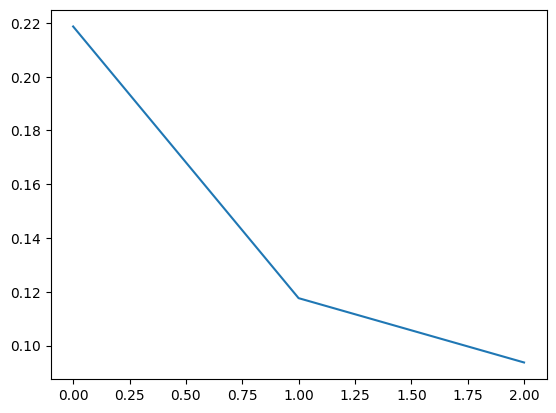

In [6]:
plot_x = range(len(pca.explained_variance_))
plot_y = pca.explained_variance_ratio_
pyplot.plot(plot_x, plot_y)

In [7]:
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression()

In [8]:
def run_prediction(X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [9]:
run_prediction(X_train, X_test, y_train, y_test)

0.8863636363636364

In [10]:
run_prediction(pca.transform(X_train), pca.transform(X_test), y_train, y_test)

0.7987012987012987

In [11]:
run_prediction(ipca.transform(X_train), ipca.transform(X_test), y_train, y_test)

0.8084415584415584